#### Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem

### make_blobs - generate Gaussian points

In [17]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.5, random_state=2)
X.shape, y.shape

((100, 2), (100,))

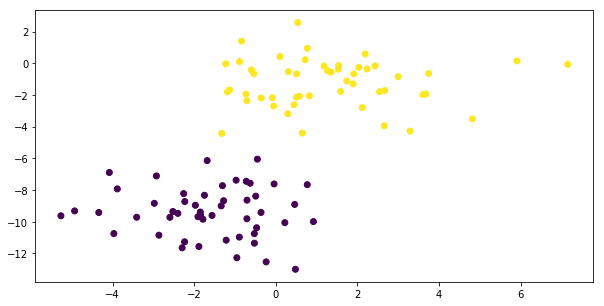

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

### Gaussian Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model

GaussianNB(priors=None)

In [21]:
model.fit(X, y)

GaussianNB(priors=None)

#### 2 columns because of 2 features, 2 rows because of 2 classes

#### sigma_: variance of each feature per class

In [22]:
model.sigma_

array([[ 2.06097005,  2.47716872],
       [ 3.33164807,  2.22401384]])

#### theta_: mean of each feature per class

In [23]:
model.theta_

array([[-1.64939095, -9.36891451],
       [ 1.29327924, -1.24101221]])

In [24]:
import numpy as np
X_new = [-6, -14] + [14, 18] * np.random.random((2000, 2))
y_new = model.predict(X_new)

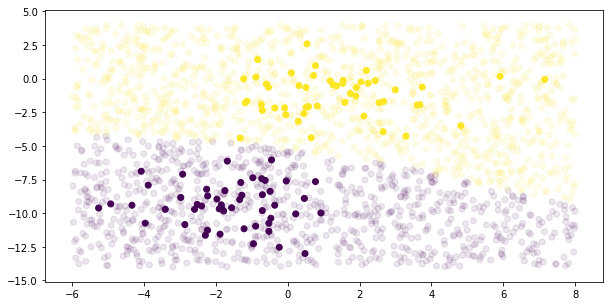

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, alpha=0.1)
plt.show()

### Probability of the samples for each class in the model

In [26]:
y_probability = model.predict_proba(X_new)
y_probability[:8].round(2)

array([[ 0.  ,  1.  ],
       [ 0.  ,  1.  ],
       [ 0.25,  0.75],
       [ 0.  ,  1.  ],
       [ 1.  ,  0.  ],
       [ 0.  ,  1.  ],
       [ 0.  ,  1.  ],
       [ 1.  ,  0.  ]])

### Gaussian Naive Bayes Cross-Validation score

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([ 1.,  1.,  1.,  1.,  1.])

### fetch_20newsgroups - 20 newsgroups dataset

In [28]:
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups()

In [29]:
len(newsgroups.data), len(newsgroups.target)

(11314, 11314)

In [30]:
print(newsgroups.data[3])

From: jgreen@amber (Joe Green)
Subject: Re: Weitek P9000 ?
Organization: Harris Computer Systems Division
Lines: 14
Distribution: world
NNTP-Posting-Host: amber.ssd.csd.harris.com
X-Newsreader: TIN [version 1.1 PL9]

Robert J.C. Kyanko (rob@rjck.UUCP) wrote:
> abraxis@iastate.edu writes in article <abraxis.734340159@class1.iastate.edu>:
> > Anyone know about the Weitek P9000 graphics chip?
> As far as the low-level stuff goes, it looks pretty nice.  It's got this
> quadrilateral fill command that requires just the four points.

Do you have Weitek's address/phone number?  I'd like to get some information
about this chip.

--
Joe Green				Harris Corporation
jgreen@csd.harris.com			Computer Systems Division
"The only thing that really scares me is a person with no sense of humor."
						-- Jonathan Winters



In [31]:
newsgroups.target[3]

1

In [32]:
newsgroups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### Multinomial Naive Bayes

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [34]:
X = newsgroups.data
y = newsgroups.target

In [35]:
model.fit(X, y)
labels = model.predict(X)

In [36]:
labels

array([7, 4, 4, ..., 3, 1, 8])

### Multinomial Naive Bayes accuracy score

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y, labels)

0.93264981438925221

### Multinomial Naive Bayes confusion matrix

In [39]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y, labels)

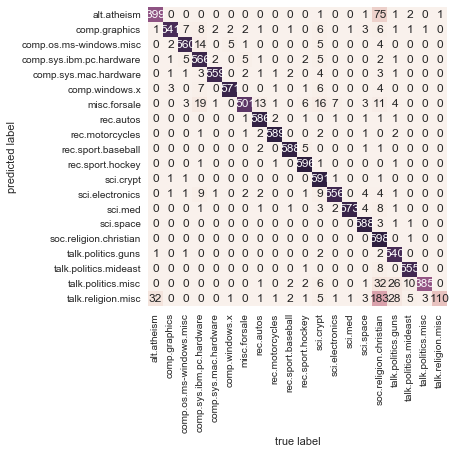

In [40]:
import seaborn as sns
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='d',
            xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

### Predict any string

In [41]:
pred = model.predict(['sending a payload to the ISS'])
newsgroups.target_names[pred[0]]

'sci.space'

In [42]:
pred = model.predict(['determining the screen resolution'])
newsgroups.target_names[pred[0]]

'comp.graphics'

### GaussianNB instead of MultinomialNB used

In [43]:
model = TfidfVectorizer()
X_tran = model.fit_transform(X)

In [44]:
len(X), X_tran.shape

(11314, (11314, 130107))

In [46]:
model = GaussianNB()
model.fit(X_tran.toarray(), y)

GaussianNB(priors=None)

In [47]:
labels = model.predict(X_tran.toarray())

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, labels)